<a href="https://colab.research.google.com/github/henrysilva07/An-lise-Explorat-ria--Varejo/blob/main/analise_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de dados de uma  Empresa Atacadista**


Neste projeto, iremos realizar um análise de dados de uma empresa de varejo/atacado que é uma tarefa bastante desafiadora e importante, uma vez que cada cliente que entra na loja, cada produto que é comprado gera um valor a ser analisado. Todos os grandes players do segmento geram dados a todo momento, dos mais diferentes tipos e fontes, porém saber como transformar esses dados em informações é essencial. 

Dito isso, é possível utilizá-los para auxiliar na tomada de decisões, seja por de análises de comportamentos dos clientes, identificar as preferências dos consumidores ou até mesmo realizar predições de consumo, com base no histórico. 




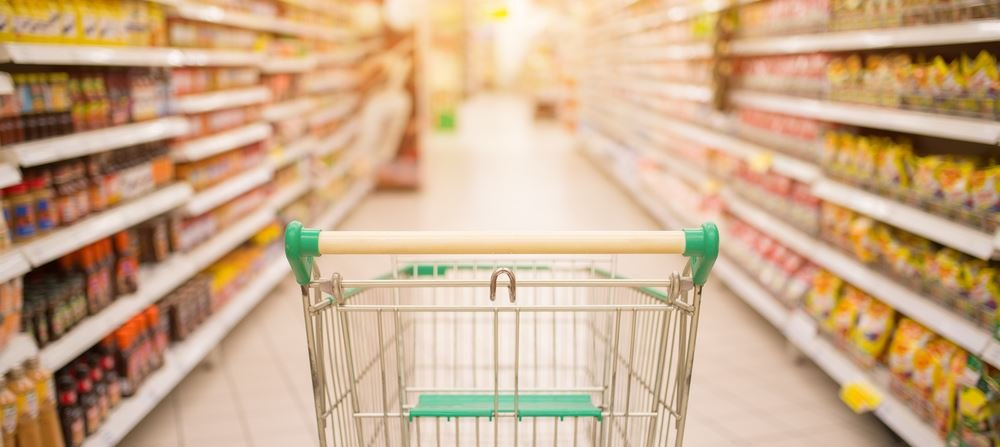


Nesse contexto, vamos analisar um conjunto de dados  de um atacadista e determinar alguns insights. Em nosso dataset, cada registro (linha) representa o gasto anual de um cliente em unidades monetários (dólar) em um distribuidor atacadista. 

Os dados utilizados nesse notebook podem ser encontrados na plataforma Kaggle : https://bit.ly/3C7U5zy   


**Objetivos**:
  * Realizar uma predição dos valores gastos com materiais de limpeza.
  * Classificar os clientes em grupos de acordo com seu consumo Supermercado x Produtos Limpeza.


### **Atributos dos dataset analisados**


1. FRESH: total anual gasto em produtos frescos;
2. MILK: total anual gasto em produtos derivados do leite;
3. GROCERY: total anual gasto em produtos de supermercado;
4. FROZEN: total anual gasto em produtos congelados;
5. DETERGENTS_PAPER: total anual gasto em produtos de limpeza;
6. DELICATESSEN: total anual gasto em produtos de delicatessen;
7. CHANNEL: tipo do canal de compra do consumidor (1- Horeca(hotel/restaurante/cafés) 2- varejo)
8. REGION: região do consumidor



**Importando as bibliotecas**

In [2]:
import numpy as np # Biblioteca utilizada para trabalhar arrays multidimensionais
import pandas as pd # Biblioteca para trabalhar com dataframe
import seaborn as sns # Biblioteca pra realizar os algoritmos de machine learning
import matplotlib.pyplot as plt # Biblioteca de visualização
import seaborn as sns   # Biblioteca de visualização 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a análise
caminho = '/content/drive/MyDrive/Colab Notebooks/AED/Análise de Varejo/wholesale_customers_data.csv'
uci_customers = pd.read_csv(caminho)

Antes de iniciar qualquer análise, vamos analiasr os 5 primeiros registros do nosso dataset.

In [ ]:
#visualizando as 5 primeiras linhas do banco de dados
uci_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Para melhor entendimento, vamos alterar o nome das variáveis do nosso dataset, deixando sua nomeclatura em português:

- "Channel": "Canal"
- "Region" : "Região"
- "Fresh" : "Frescos"
- "Mile": "Der_leite"
- "Grocery" : "Prod_Supermercados"
- "Frozen": "Congelados"
- "Detergents_paper" : Prod_limpeza
- "Delicaseen:  "Delicatessen" 




In [4]:
col = {'Channel':'Canal' , 'Region':'Região' , 'Fresh' : 'Frescos' , 'Milk' : 'Der_leite' , 'Grocery': 'Prod_supermercados', 'Frozen': 'Congelados' , 'Detergents_Paper':'Prod_limpeza', 'Delicassen':'Delicatessen'}

In [5]:
# Alterando a nomeclatura dos dados
uci_customers.rename( columns = col , inplace= True)

**Quantas colunas (características) e linhas (instâncias) existem no dataset? E qual o tipo dos dados?**

In [17]:
print("Esturutura do Dataset:\n")
print(f'Linhas: {uci_customers.shape[0]}')
print(f'Colunas: {uci_customers.shape[1]}\n')

display(uci_customers.dtypes)

Esturutura do Dataset:

Linhas: 440
Colunas: 8



Canal                 int64
Região                int64
Frescos               int64
Der_leite             int64
Prod_supermercados    int64
Congelados            int64
Prod_limpeza          int64
Delicatessen          int64
dtype: object

**Quantos valores nulos (NAN) existem no dataset?**

O tamanho do dataset está diretamente relacionado com percentual de valores nulos; Desse modo, é de extrema importância identificar o seu percentual para realizar os tratamentos necessários.

In [8]:
# Verificando os valores nulos
(uci_customers.isnull().sum() / uci_customers.shape[0]) * 100

Canal                 0.0
Região                0.0
Frescos               0.0
Der_leite             0.0
Prod_supermercados    0.0
Congelados            0.0
Prod_limpeza          0.0
Delicatessen          0.0
dtype: float64

O nosso dataframe não aprensentou nenhum valor nulos, então podemos seguir com nossa análise. 

**Informações Estatísticas**

In [18]:

uci_customers.describe() 

,Canal,Região,Frescos,Der_leite,Prod_supermercados,Congelados,Prod_limpeza,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Qual é a valor médio de gasto anual com derivados do leite (Der_leite)?**

O valor médio com derivados do leite foi de  7.951 dólares, porém com uma mediana de  4.755 dólares, o que indica que há  valores que estão deixando a média viesada à direita.

Text(0.5, 1.0, 'Gastos anuais de produtos derivados do leite')

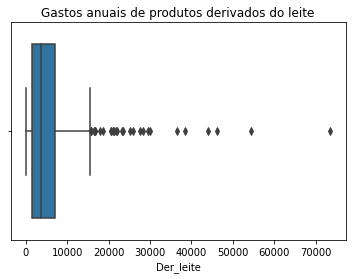

In [19]:
# Analisando o bloxplot - identificando os outliers
sns.boxplot(data = uci_customers , x = 'Der_leite')
plt.title("Gastos anuais de produtos derivados do leite")

In [ ]:
# Vamos considerar outliers, valores acima de 20.000, 
filtro = uci_customers['Der_leite'] > 20000
# Contando os valores outliers
uci_customers[filtro].count()

Canal                 20
Região                20
Frescos               20
Der_leite             20
Prod_supermercados    20
Congelados            20
Prod_limpeza          20
Delicatessen          20
dtype: int64

In [ ]:
filtro = uci_customers['Der_leite'] < 25000
uci_customers[filtro].describe()

,Canal,Região,Frescos,Der_leite,Prod_supermercados,Congelados,Prod_limpeza,Delicatessen
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1.308411,2.537383,11565.271028,4886.474299,7154.455607,2962.161215,2498.427570,1327.997664
std,0.462378,0.777918,11584.837416,4497.956713,7501.500339,4587.616832,3832.325612,1516.198949
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3094.500000,1490.500000,2127.000000,712.000000,255.750000,404.750000
50%,1.000000,3.000000,8223.500000,3581.500000,4603.000000,1498.000000,784.000000,927.000000
75%,2.000000,3.000000,16711.500000,6847.500000,9800.250000,3505.250000,3633.500000,1774.250000
max,2.000000,3.000000,76237.000000,23527.000000,67298.000000,60869.000000,38102.000000,14472.000000


ao desconsiderar os outliers, é possível verificar  que o valor médio para produtos derivados do leite foi 4.886, 47, a qual representa melhor a realidade. 

**Qual é o maior valor gasto com produtos congelados (Frozen)?**

In [20]:
# Valor máximo gasto
uci_customers.Congelados.max()

60869

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.**

**Existem possíves outliers para as colunas Fresh e Grocery?**

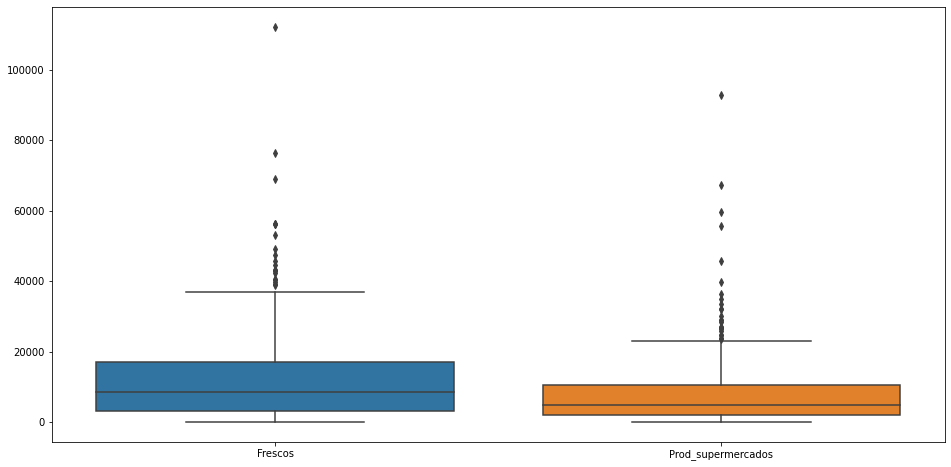

In [ ]:
plt.figure(figsize=(16,8))
#uci_customers.boxplot(column=['Frescos','Prod_supermercados'])  #constroi o boxplot para o total gasto em alimentos frescos e de supermercado
sns.boxplot( data = uci_customers[['Frescos','Prod_supermercados']])


O total de gastos anuais com supermercado apresenta um maior número de outliers, porém com uma menor variabiliadade.

**Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes.**

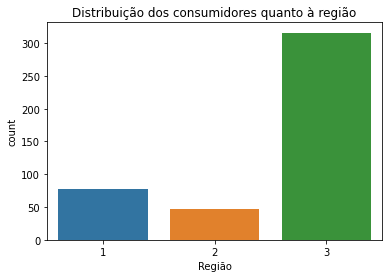

In [ ]:
#analisando a distribuição dos clientes por gênero
sns.countplot(x='Região', data=uci_customers); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição dos consumidores quanto à região');  #adiciona o título no gráfico

Nitidamente, é possível identificar que o maior número de pessoas estão concentrados na região 1. 

**Distribuição dos consumidores pelo gasto com produtos derivados do leite**

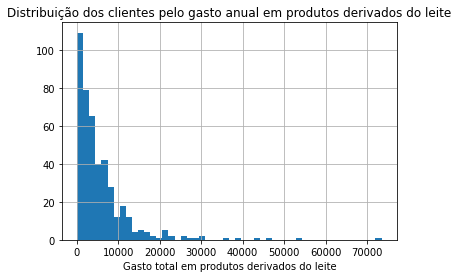

In [ ]:
#analisando a distribuição dos clientes quanto ao total de gastos com produtos derivados do leite através do histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados

uci_customers.hist('Der_leite', bins=50);  #seleciona a coluna de total de gastos para realizar o histograma

plt.title('Distribuição dos clientes pelo gasto anual em produtos derivados do leite');# adiciona o título ao gráfico (histograma)
plt.xlabel('Gasto total em produtos derivados do leite');


A variável milk apresentou uma distribuição assícrona à direita, com uma maior concnetração dos gastos entre 0 à 20000, porém poucas pessoas apresentaram gastos acima de 50000.

**Vamos analisar qual tipo de canal é maior consumidor de produtos derivados do leite.** 

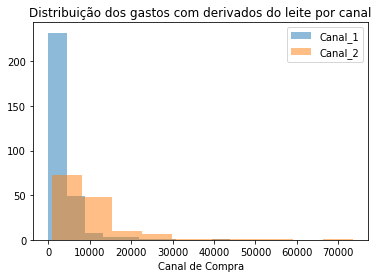

In [ ]:
canal_1=uci_customers[uci_customers['Canal']==1] #seleciona o canal 1
canal_2= uci_customers[uci_customers['Canal']==2] #seleciona a comunicação pelo canal 2
plt.hist('Der_leite', data=canal_1, alpha=0.5, label='Canal_1'); #cria o histograma apenas do canal 1
plt.hist('Der_leite', data=canal_2, alpha=0.5, label='Canal_2'); #cria o histograma apenas para o canal 2
plt.title('Distribuição dos gastos com derivados do leite por canal'); #adiciona o título ao gráfico
plt.xlabel('Canal de Compra'); # adiciona o label para o eixo x
plt.legend(); #adiciona a legenda

O gráfico acima nos diz muito sobre a características de cada canal. O canal 2 ( empresas de varejo ) tendem a gastar maiores valores, pois compram para revendas, já o canal 1 (Hotéis, restaurantes e cafés) apresentam uma maior concentração em pequenos valores de até 10000 dólares.

In [25]:
uci_customers.columns

Index(['Canal', 'Região', 'Frescos', 'Der_leite', 'Prod_supermercados',
       'Congelados', 'Prod_limpeza', 'Delicatessen'],
      dtype='object')

**Analisando o impacto da região nos gastos com supermercado.**

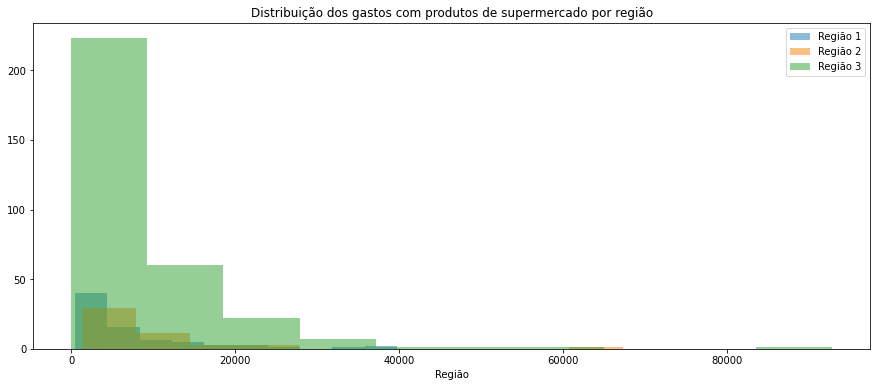

In [27]:
plt.figure(figsize=(15,6))


regiao_1=uci_customers[uci_customers['Região'] == 1]
regiao_2=uci_customers[uci_customers['Região'] == 2]
regiao_3=uci_customers[uci_customers['Região'] == 3]

plt.hist('Prod_supermercados', data=regiao_1, alpha=0.5, label='Região 1');
plt.hist('Prod_supermercados', data=regiao_2, alpha=0.5, label='Região 2');
plt.hist('Prod_supermercados', data=regiao_3, alpha=0.5, label='Região 3');

plt.title('Distribuição dos gastos com produtos de supermercado por região');
plt.xlabel('Região');
plt.legend();

**Analisando a correlação entre as variáveis**

Correlação significa semelhança ou relação entre duas coisas. No nosso contexto, estamos procurando correlação entre duas variáveis dentro do nosso dataset

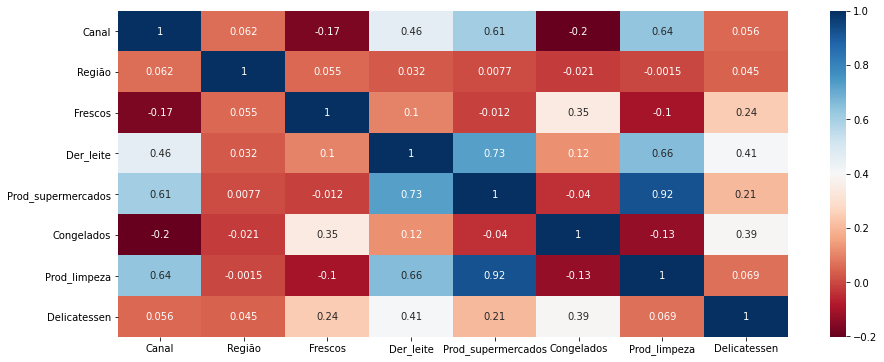

In [31]:
plt.figure(figsize=(15,6))

sns.heatmap(uci_customers.corr(), cmap='RdBu', annot=True); # desenha a matriz de correlação entre cada um dos dados 

O mapa de calor de correlações está indicando uma forte correlação positiva entre a variável Prod_supermercados e Prod_limpeza, apresnetando um coenficiente de 0.92. Tal hipótese pode ser confirmada pelo gráfico abaixo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


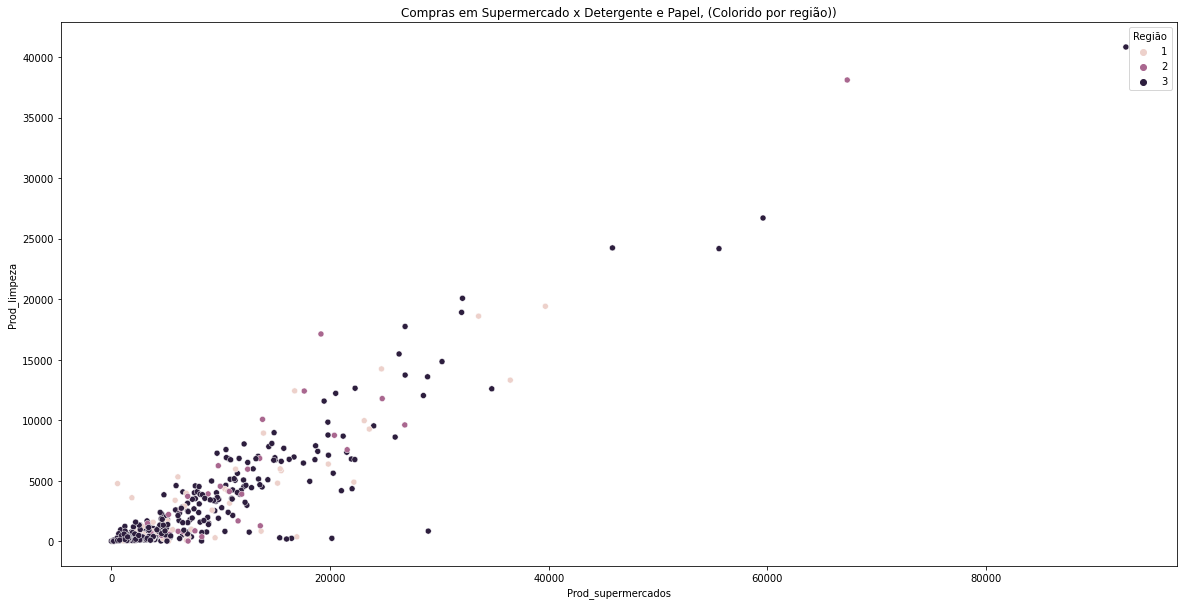

In [33]:
plt.figure(figsize=(20,10))

sns.scatterplot('Prod_supermercados', 'Prod_limpeza', hue='Região', data=uci_customers);  #realiza o plot do gráfico de dispersão 
plt.title('Compras em Supermercado x Detergente e Papel, (Colorido por região))'); #adiciona o título ao gráfico

**Aplicando a regressão linear - Prever o gasto com produtos de higiene a partir dos gastos com supermercado**

Para realizar a predição, iremos realizar a técnica de regressão linear, utilizando como parâmetros 80% dos dados para treino e 20% para teste.

In [52]:
from sklearn.model_selection import train_test_split #utilizada para dividir o dataset entre dados de entrada e saída
from sklearn.linear_model import LinearRegression  #biblioteca que contém o modelo de regressão linear
from sklearn import metrics #utilizada para avaliar o modelo desenvolvido

In [53]:
X = uci_customers['Prod_supermercados'].values.reshape(-1,1)  # (transforma em uma matriz)
y = uci_customers['Prod_limpeza'].values.reshape(-1,1)  #(transforma em uma matriz)

In [54]:
# Definindo o conjunto de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #dividindo o df em treinamento (80%) e teste (20%)

In [55]:
regressor = LinearRegression() #objeto para a construção do medelo de regressão linear 
regressor.fit(X_train, y_train) #treinamento do algoritmo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

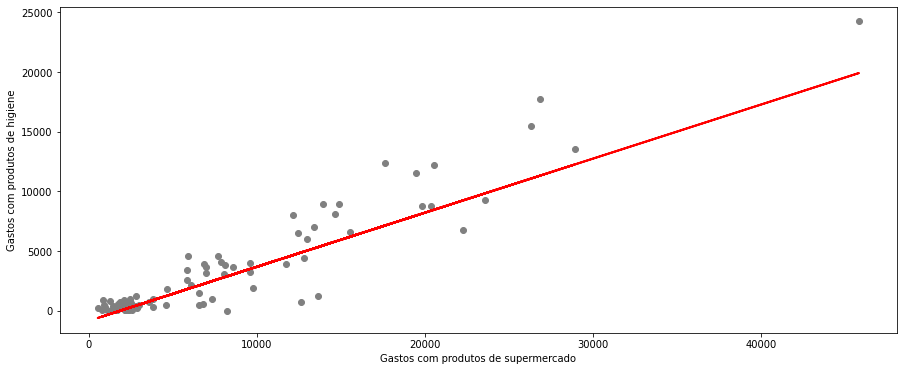

In [56]:
plt.figure(figsize=(15,6))
y_pred = regressor.predict(X_test)  #previsão do modelo de regressão
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Gastos com produtos de supermercado')
plt.ylabel('Gastos com produtos de higiene')
plt.show()

In [57]:
#calculando o coeficiente de determinação R2 para o modelo
from sklearn.metrics import r2_score  #utilizada para calcular o R2
r2_score(y_test,y_pred)

0.847492289734609

O coeficiente de determinação R2 nos indica que 84,7% da variável Gastos com produtos de Higiene pode ser explicado pela variável Gastos com produtos de supermercado.

In [46]:
#coeficientes da reta
print("A equação da reta é Y = {}*X {}".format(regressor.coef_[0],regressor.intercept_[0]))

A equação da reta é Y = [0.45264797]*X -839.4404680193988


**Realizando a predição de um valor**

In [61]:
gastos = float(input("Informe o valor do gastos com supermercados: "))


Informe o valor do gastos com supermercados: 30000


In [66]:
#realizando a previsão de gastos com produtos de higiene dado que o consumidor gastou 25000 com supermercado
valor = regressor.predict(np.array([gastos]).reshape(-1,1))
valor = round(float(valor), 2 ) 

In [67]:
print(f'Ao se gastar {gastos} com produtos no supermercado , {valor} serão gastos com produtos de limpeza')

Ao se gastar 30000.0 com produtos no supermercado , 12740.0 serão gastos com produtos de limpeza


**Segmentação de clientes utilizando compras no supermercado e produtos de limpeza.**

In [68]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans

In [69]:
#obtém os dados para a construção do banco de dados apenas com compras de congelados e produtos de limpeza
segmentacao_1 = uci_customers[['Prod_supermercados' , 'Prod_limpeza']].iloc[: , :].values #transforma os dados em array


In [70]:
kmeans = KMeans(n_clusters=3) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

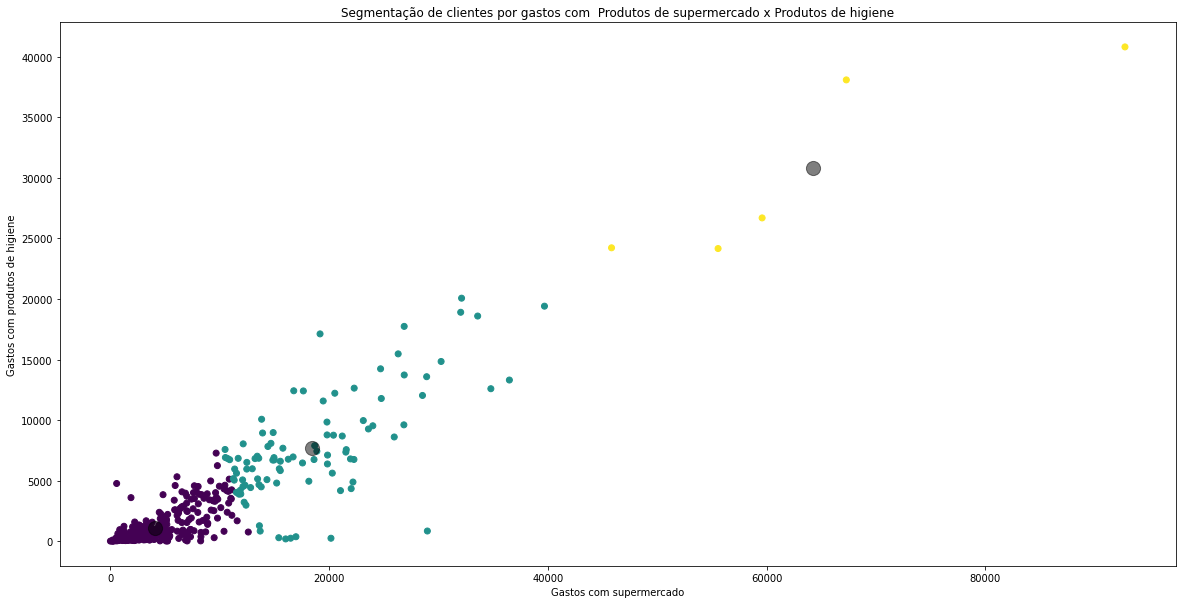

In [73]:
#inicia a construção da figura
plt.figure(figsize = (20 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Gastos com supermercado")  #adiciona o label para o eixo X
plt.ylabel("Gastos com produtos de higiene") #adiciona o label para o eixo Y
plt.title("Segmentação de clientes por gastos com  Produtos de supermercado x Produtos de higiene"); #adiciona o título

Com a classiicação , é possível notar que a maioria dos clientes apresentam um baixo gasto com supermercado, o que implica em um menor consumo de produtos de limpeza, porém uma grande parcela apresenta um consumo mediano. 

## **Conclusão**

Foi realizado somente uma análise superficial nos dados, uma vez que é um dataset pequeno em comparação aos dados gerados por uma empresa do setor, porém já se percebeu a forte correlação entre os gastos com supermercado e produtos de limpeza. 

Verificamos que a região 3 apresentou uma forte contribuição nos gastos totais. Além disso, percebemos que o setor de varejo é o principal comprador em valores brutos de um atacadista.

 

